In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Spending Score (1-100)')

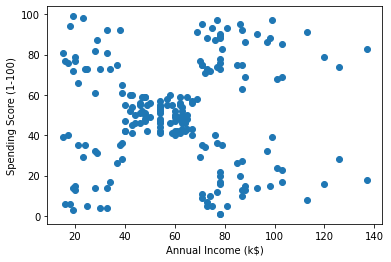

In [8]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")


In [11]:
kmeans=KMeans()
clusters=kmeans.fit_predict(x)
clusters

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 6, 2, 6, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [15]:
x[clusters==6]

,Annual Income (k$),Spending Score (1-100)
40,38,35
42,39,36
43,39,61
45,39,65
46,40,55
47,40,47
48,40,42
49,40,42
50,42,52
51,42,60


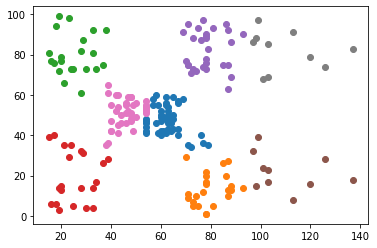

In [17]:
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"],x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"],x[clusters==6]["Spending Score (1-100)"])
plt.scatter(x[clusters==7]["Annual Income (k$)"],x[clusters==7]["Spending Score (1-100)"])

In [19]:
silhouette_score(x,kmeans.labels_)

0.4551839202075395

In [21]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss
    

C:\Users\ad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 24986.52564064288,
 21932.39204424098]

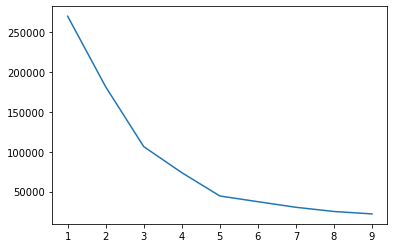

In [22]:
plt.plot(list(range(1,10)),wcss)

In [23]:
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(x)
clusters

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

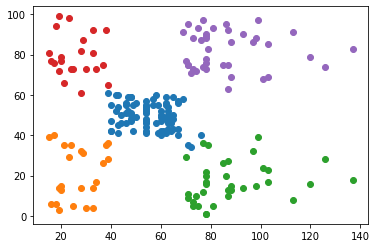

In [24]:
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"],x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"],x[clusters==6]["Spending Score (1-100)"])
plt.scatter(x[clusters==7]["Annual Income (k$)"],x[clusters==7]["Spending Score (1-100)"])

In [25]:
silhouette_score(x,kmeans.labels_)

0.553931997444648

In [26]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss
    

C:\Users\ad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28,
 183069.17582751293,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 31644.319037920202,
 25036.417604033984,
 21913.92920119442]

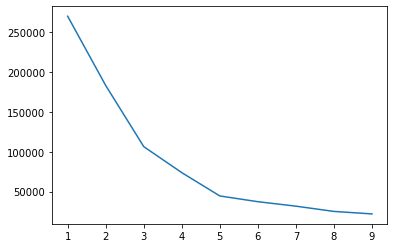

In [29]:
plt.plot(list(range(1,10)),wcss)